<a href="https://colab.research.google.com/github/somak135/diss_rg/blob/main/mid-report/code4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import multiprocessing
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


def hardselect(M,n,p):
    size = int(np.floor(n*p))
    degree_seq = np.array(np.sum(M, axis = 1)[0:n])
    if size == 0:
        taboo = np.array([], dtype = int)
    else:
        taboo = np.argpartition(degree_seq, -size)[-size:]
    return np.array(taboo)
    

def softselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #checked -- updates prob
    return taboo

def softselect_one(M,n):
    size = 1
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #checked -- updates prob
    return taboo

def simulate_graph(N,p,m=1,mode = "hard",seed = 1):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    np.random.seed(seed)
    for i in range(2,N):
        if mode == "hard" and isinstance(m ,int):
            taboo = hardselect(M,i,p)
        elif mode == "soft" and isinstance(m, int):
            taboo = softselect(M,i,p)
        elif mode == "soft_one" and isinstance(m, int):
            taboo = softselect_one(M,i)
        else:
            raise ValueError("no such mode of selecting taboo")
        
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = m)
        for q in edge_end:
          M[i,q] += 1; M[q,i] += 1
        
    
    deg_seq = np.sort(np.sum(M, axis = 1))
    return deg_seq

def find_deg_seq(N, p, S, m=1, mode = "hard", seed = 1):
    inputs = range(0,S)
    mylist = []
    mylist = Parallel(n_jobs=-1)(delayed(simulate_graph)(N,p,m,mode,(seed+i)) for i in inputs) ## matrix structure containing copies of deg sequences

    min_deg = np.min(mylist)
    max_deg = np.max(mylist)
    deg_vec = np.zeros(shape = (S, max_deg+1-min_deg), dtype = float)
    for i in range(0,S):
      s = np.array([])
      for j in range(min_deg, (max_deg+1)):
        s = np.append(s, np.count_nonzero(mylist[i] == j))
      
      deg_vec[i, ] = s/N

    mean_deg_vec = np.array([]); var_deg_vec = np.array([]); sd_deg_vec = np.array([])
    for j in range(min_deg, (max_deg+1)):
      p_j = np.array([])
      for i in range(0,S):
        p_j = np.append(p_j, deg_vec[i][(j-min_deg)])
      mean_deg_vec = np.append(mean_deg_vec, np.mean(p_j))
      var_deg_vec = np.append(var_deg_vec, np.var(p_j))
      sd_deg_vec = np.append(sd_deg_vec, np.sqrt(np.var(p_j)))


    #return mylist, deg_vec, min_deg, max_deg
    return deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec



**HARD MODE**

$p = 0.01$

Text(0, 0.5, 'standard deviation of P_k(t)')

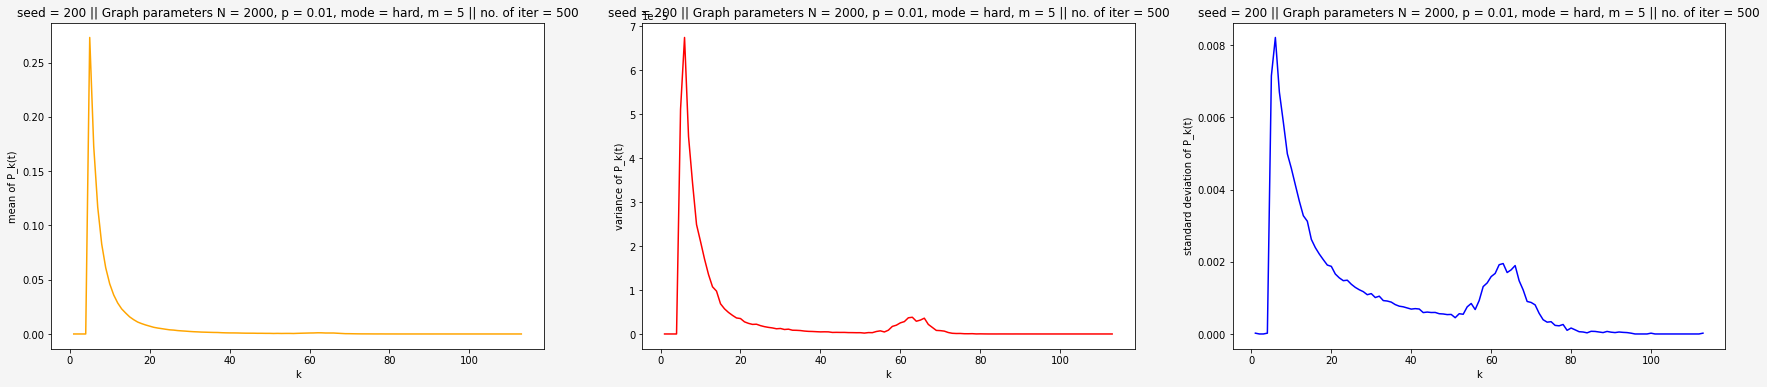

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.025$

Text(0, 0.5, 'standard deviation of P_k(t)')

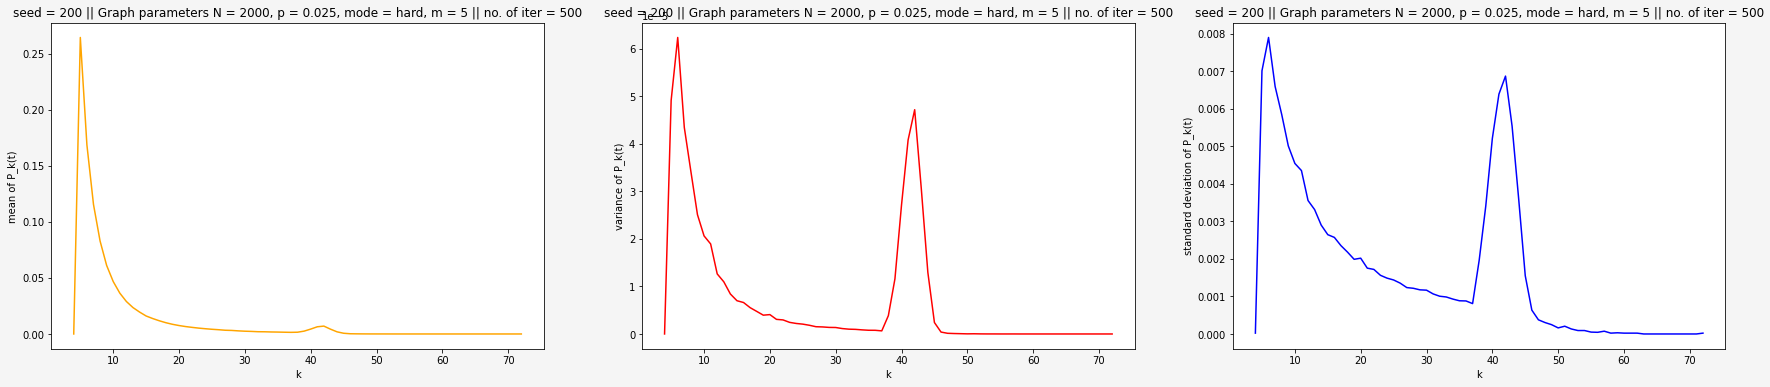

In [ ]:
N = 2000; p = 0.025; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.05$

Text(0, 0.5, 'standard deviation of P_k(t)')

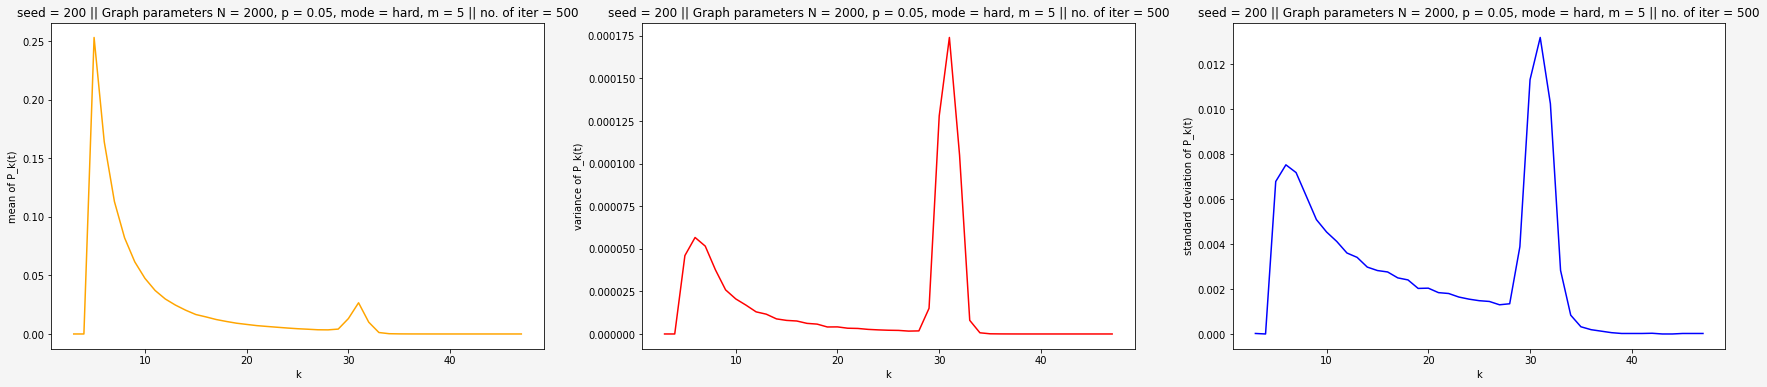

In [ ]:
N = 2000; p = 0.05; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.1$

Text(0, 0.5, 'standard deviation of P_k(t)')

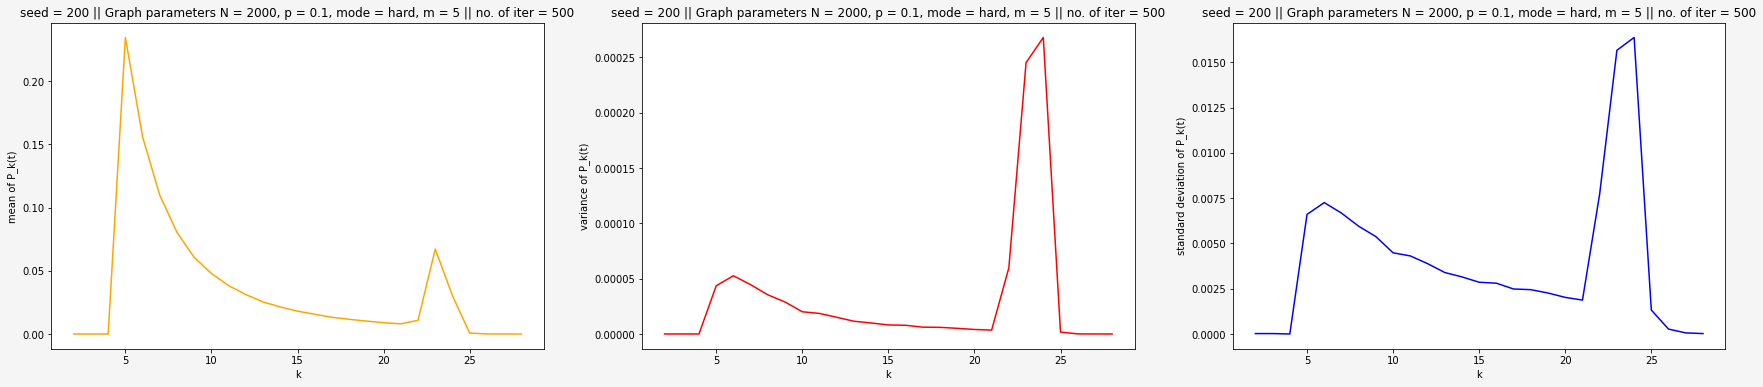

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.25$

Text(0, 0.5, 'standard deviation of P_k(t)')

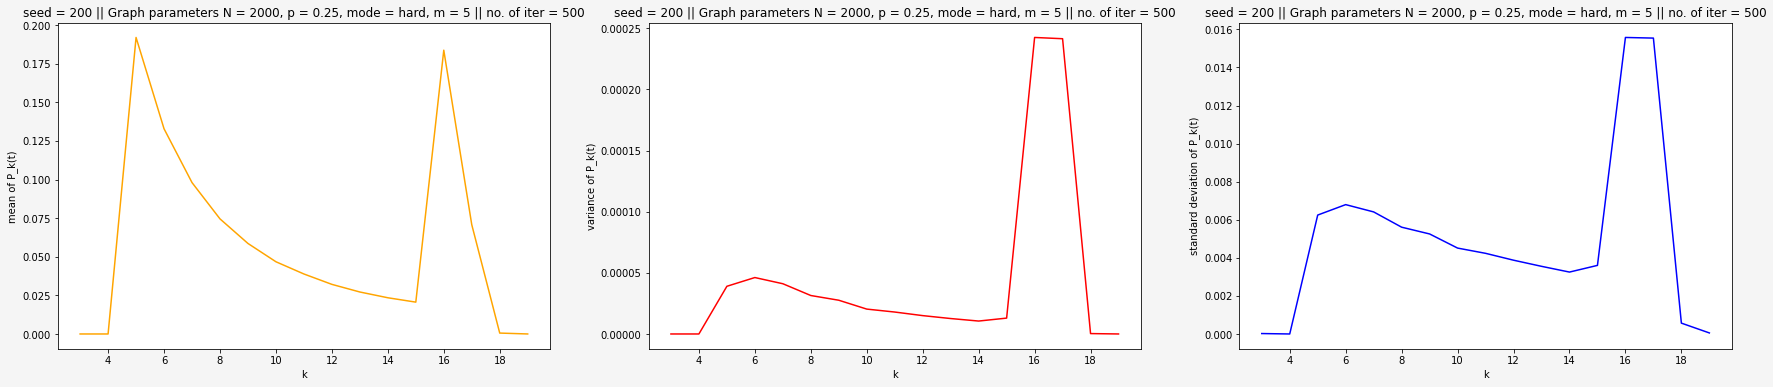

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.5$

Text(0, 0.5, 'standard deviation of P_k(t)')

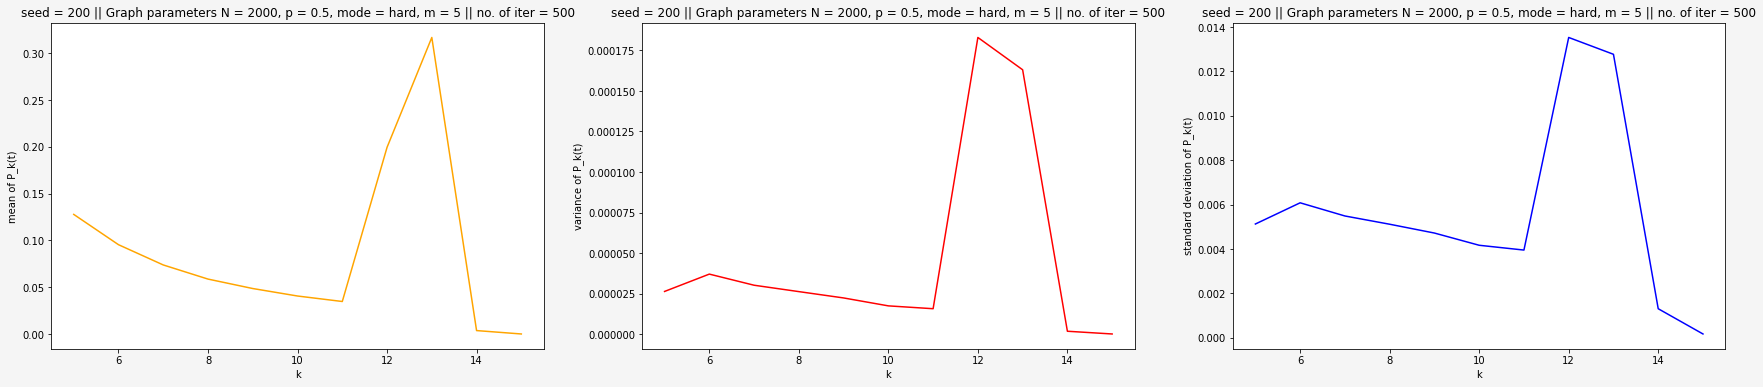

In [ ]:
N = 2000; p = 0.5; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

**SOFT MODE**

$p=0.01$

Text(0, 0.5, 'standard deviation of P_k(t)')

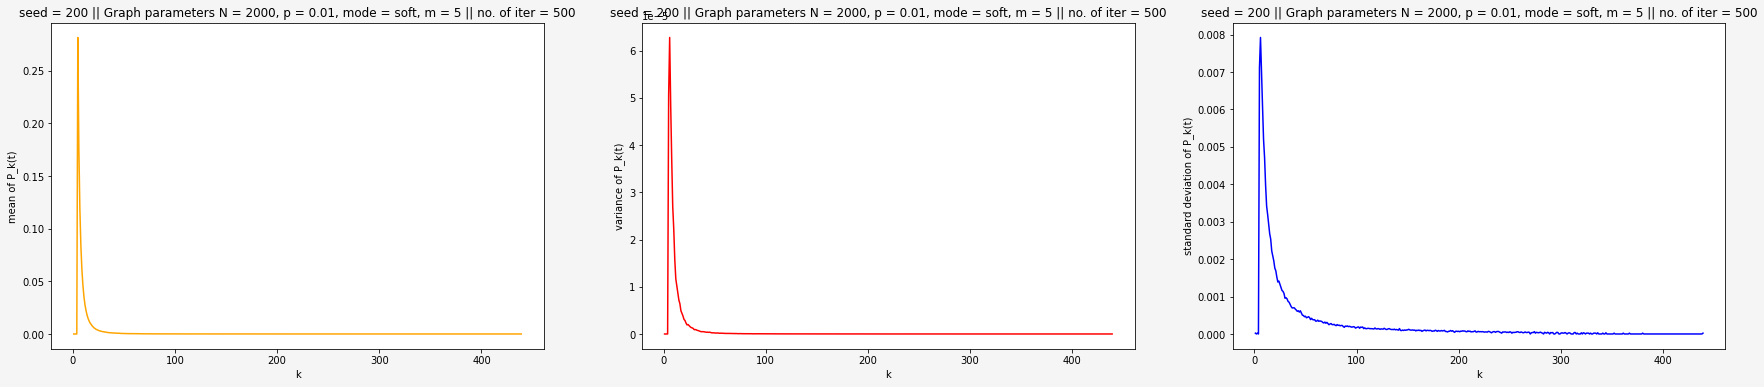

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; mode = "soft"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.025$

Text(0, 0.5, 'standard deviation of P_k(t)')

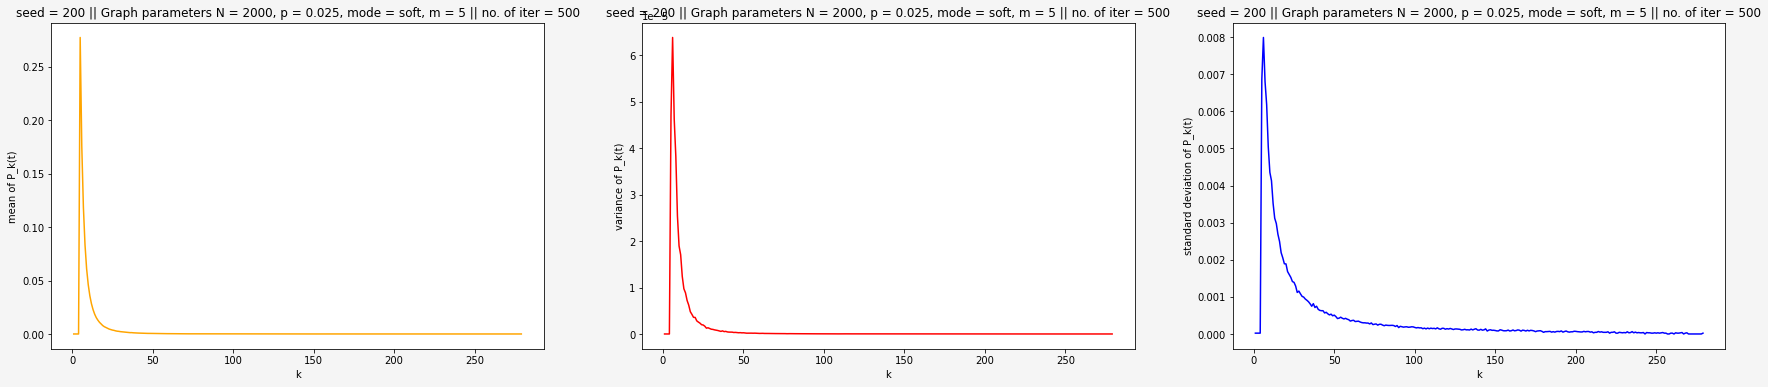

In [ ]:
N = 2000; p = 0.025; seed = 200; S = 500; mode = "soft"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.05$

Text(0, 0.5, 'standard deviation of P_k(t)')

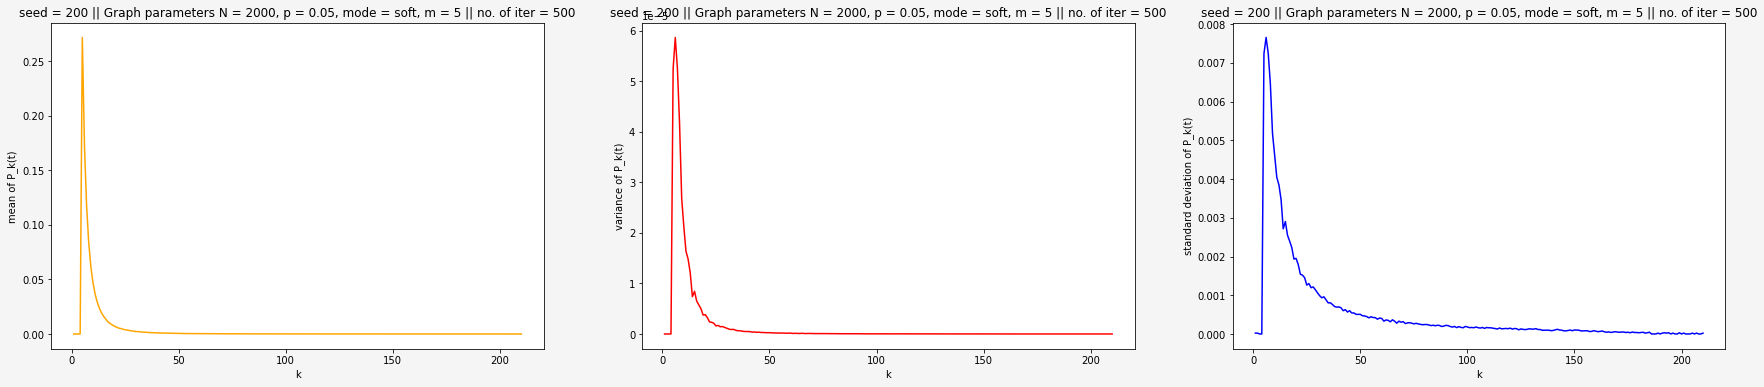

In [ ]:
N = 2000; p = 0.05; seed = 200; S = 500; mode = "soft"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.1$

Text(0, 0.5, 'standard deviation of P_k(t)')

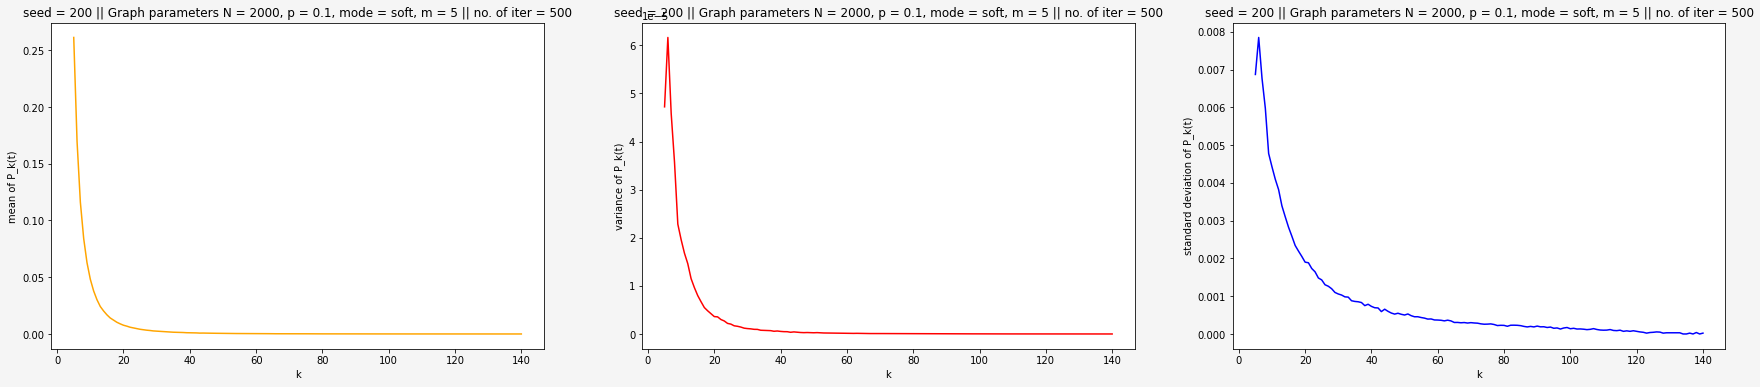

In [ ]:
N = 2000; p = 0.1; seed = 200; S = 500; mode = "soft"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.25$

Text(0, 0.5, 'standard deviation of P_k(t)')

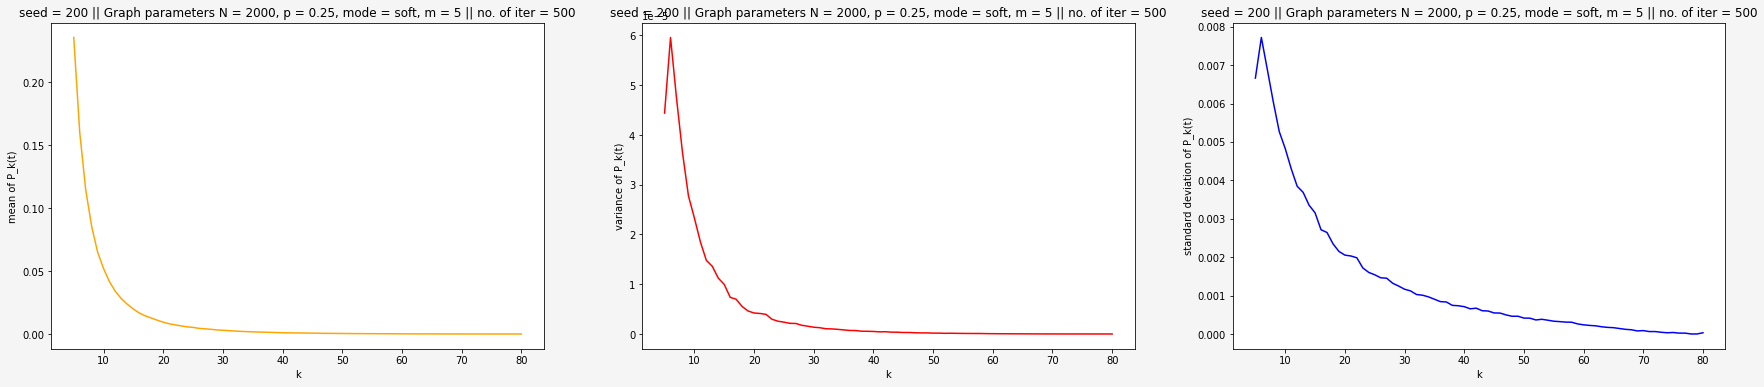

In [ ]:
N = 2000; p = 0.25; seed = 200; S = 500; mode = "soft"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

$p=0.5$

Text(0, 0.5, 'standard deviation of P_k(t)')

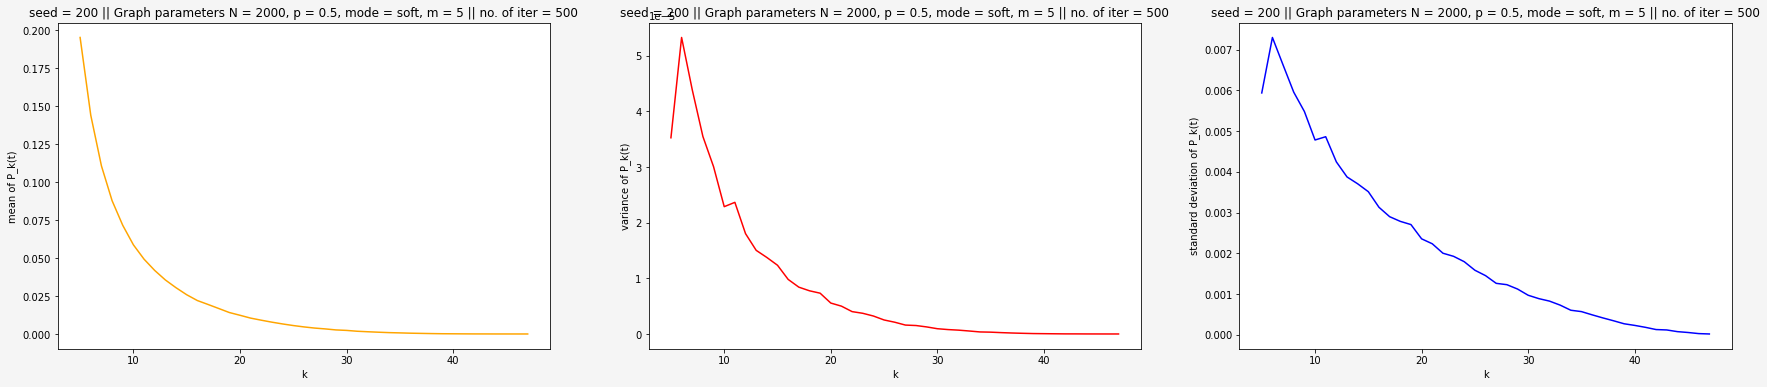

In [ ]:
N = 2000; p = 0.5; seed = 200; S = 500; mode = "soft"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

**SOFT(Alternative) MODE**

Text(0, 0.5, 'standard deviation of P_k(t)')

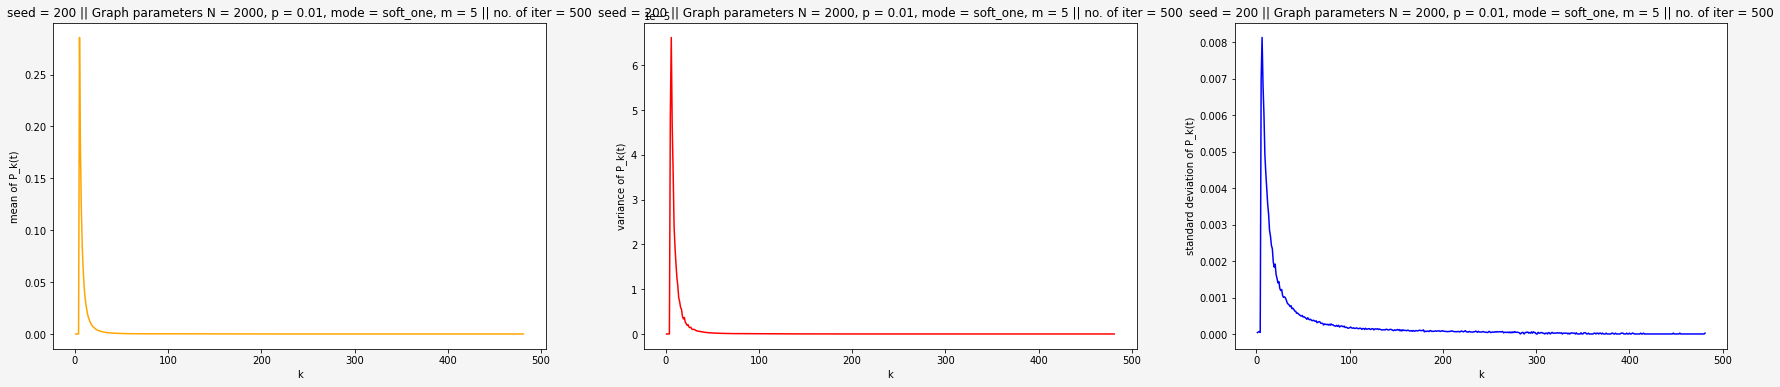

In [ ]:
N = 2000; p = 0.01; seed = 200; S = 500; mode = "soft_one"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")

**Preferential attachment**

Text(0, 0.5, 'standard deviation of P_k(t)')

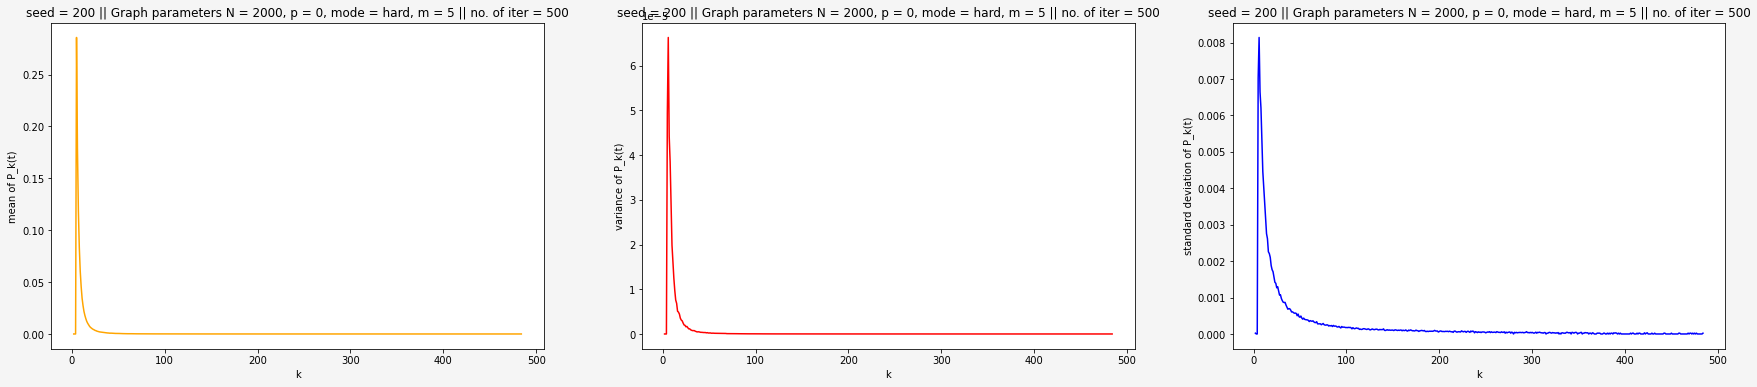

In [ ]:
N = 2000; p = 0; seed = 200; S = 500; mode = "hard"; m =5
title = f"seed = {seed} || Graph parameters N = {N}, p = {p}, mode = {mode}, m = {m} || no. of iter = {S}"
deg_vec, min_deg, max_deg, mean_deg_vec, var_deg_vec, sd_deg_vec = find_deg_seq(N, p, S, m, mode = mode, seed = seed)
plt.figure(figsize=(30,6), facecolor="whitesmoke")
plt.subplot(1,3,1)
plt.plot(range(min_deg, (max_deg+1)), mean_deg_vec, color = "orange")
plt.title(title)
plt.xlabel("k"); plt.ylabel("mean of P_k(t)")
plt.subplot(1,3,2)
plt.plot(range(min_deg, (max_deg+1)), var_deg_vec, color = "red")
plt.title(title)
plt.xlabel("k"); plt.ylabel("variance of P_k(t)")
plt.subplot(1,3,3)
plt.plot(range(min_deg, (max_deg+1)), sd_deg_vec, color = "blue")
plt.title(title)
plt.xlabel("k"); plt.ylabel("standard deviation of P_k(t)")